<a href="https://colab.research.google.com/github/sarahhkhann/DS340-FinalProject/blob/main/ds340_final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving fr.csv to fr.csv


<ipython-input-1-e20928f90100>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fr['start'] = pd.to_datetime(data_fr['start'])


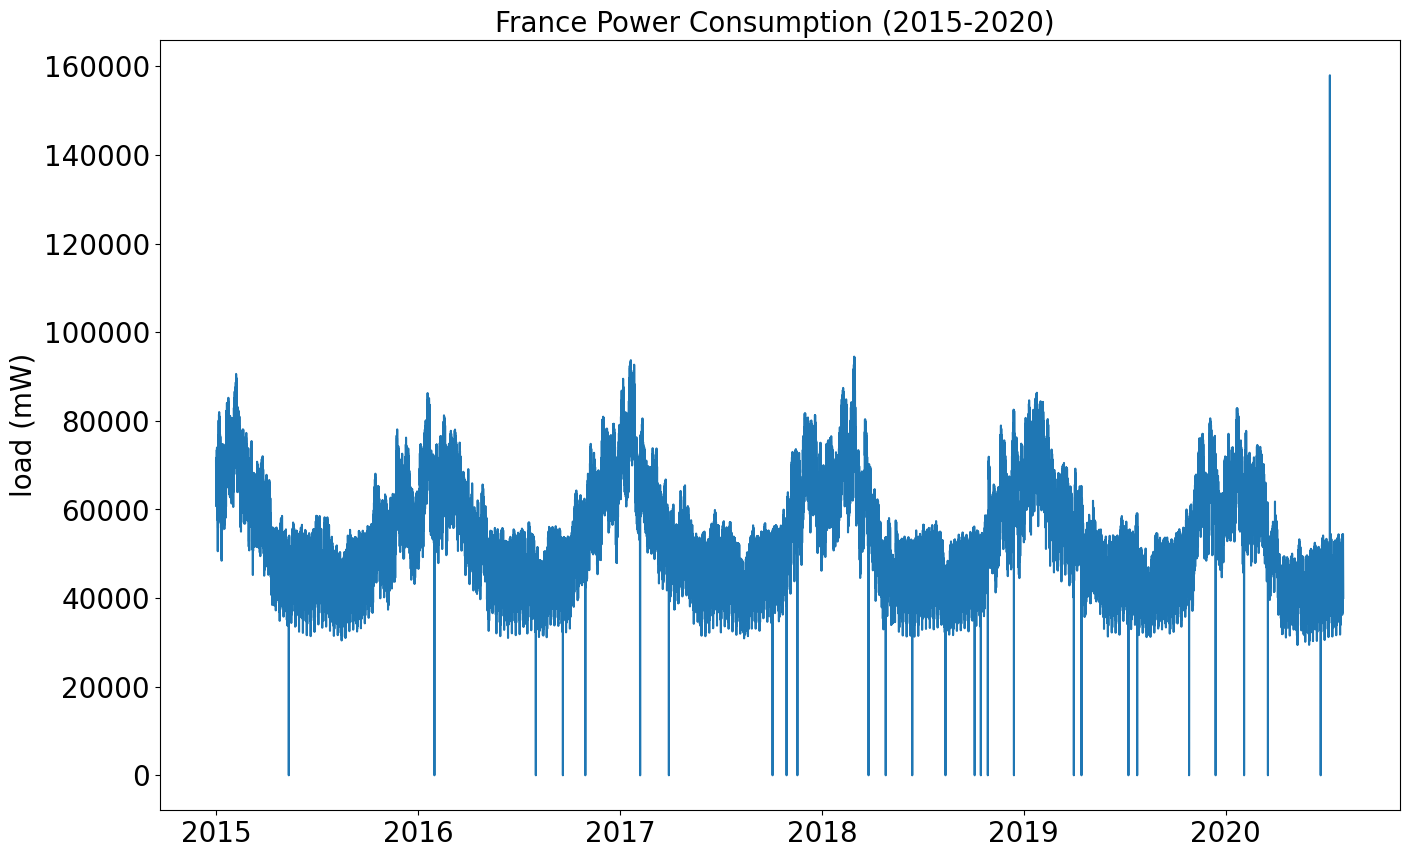

In [ ]:
"""
@author: vishva and sarah
Dataset: https://www.kaggle.com/francoisraucent/western-europe-power-consumption
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

import folium #to display interactive maps

import pandas as pd
from google.colab import files


#FRANCE DATASET

# Upload the CSV file
uploaded = files.upload()


# Read the CSV file
data = pd.read_csv('fr.csv')


# Drop the 'end' column
data_fr = data.drop(['end'], axis=1)


# Print the first 5 rows of the new DataFrame
# print(data_de.head())

train_set_fr = data_fr.loc[data_fr['start'] <= '2015-01-31 00:00']
train_set_fr = train_set_fr.set_index("start")
train_set_fr.index = pd.to_datetime(train_set_fr.index)
train_set_fr = train_set_fr.groupby(pd.Grouper(freq="h")).sum()

test_set_fr  = data_fr.loc[data_fr['start'] > '2015-01-31 00:00']
test_set_fr = test_set_fr.set_index("start")
test_set_fr.index = pd.to_datetime(test_set_fr.index)
test_set_fr = test_set_fr.groupby(pd.Grouper(freq="h")).sum()

data_fr = data[['start', 'load']]
data_fr['start'] = pd.to_datetime(data_fr['start'])
data_fr = data_fr.set_index("start")
data_fr = data_fr.groupby(pd.Grouper(freq="h")).sum()

data_fr['start'] = pd.to_datetime(data_fr.index)

plt.figure(figsize=(16,10))
plt.plot(data_fr['start'], data_fr['load'])
plt.ylabel("load (mW)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('France Power Consumption (2015-2020) ',fontsize=20)

#scaling, train_test_split

scaler_fr=StandardScaler()
scaler_fr = scaler_fr.fit(train_set_fr[['load']])

train_set_fr['load'] = scaler_fr.transform(train_set_fr[['load']])
test_set_fr['load'] = scaler_fr.transform(test_set_fr[['load']])

last_n = 24

def to_sequences(x, y, seq_size=1):
    x_values_fr = []
    y_values_fr = []
    for i in range(len(x)-last_n):
        x_values_fr.append(x.iloc[i:(i+last_n)].values)
        y_values_fr.append(y.iloc[i+last_n])
    return np.array(x_values_fr), np.array(y_values_fr)

x_train_fr, y_train_fr = to_sequences(train_set_fr[['load']], train_set_fr['load'], last_n)
x_test_fr, y_test_fr = to_sequences(test_set_fr[['load']], test_set_fr['load'], last_n)



Saving es.csv to es.csv


<ipython-input-2-d17149011004>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_es['start'] = pd.to_datetime(data_es['start'])


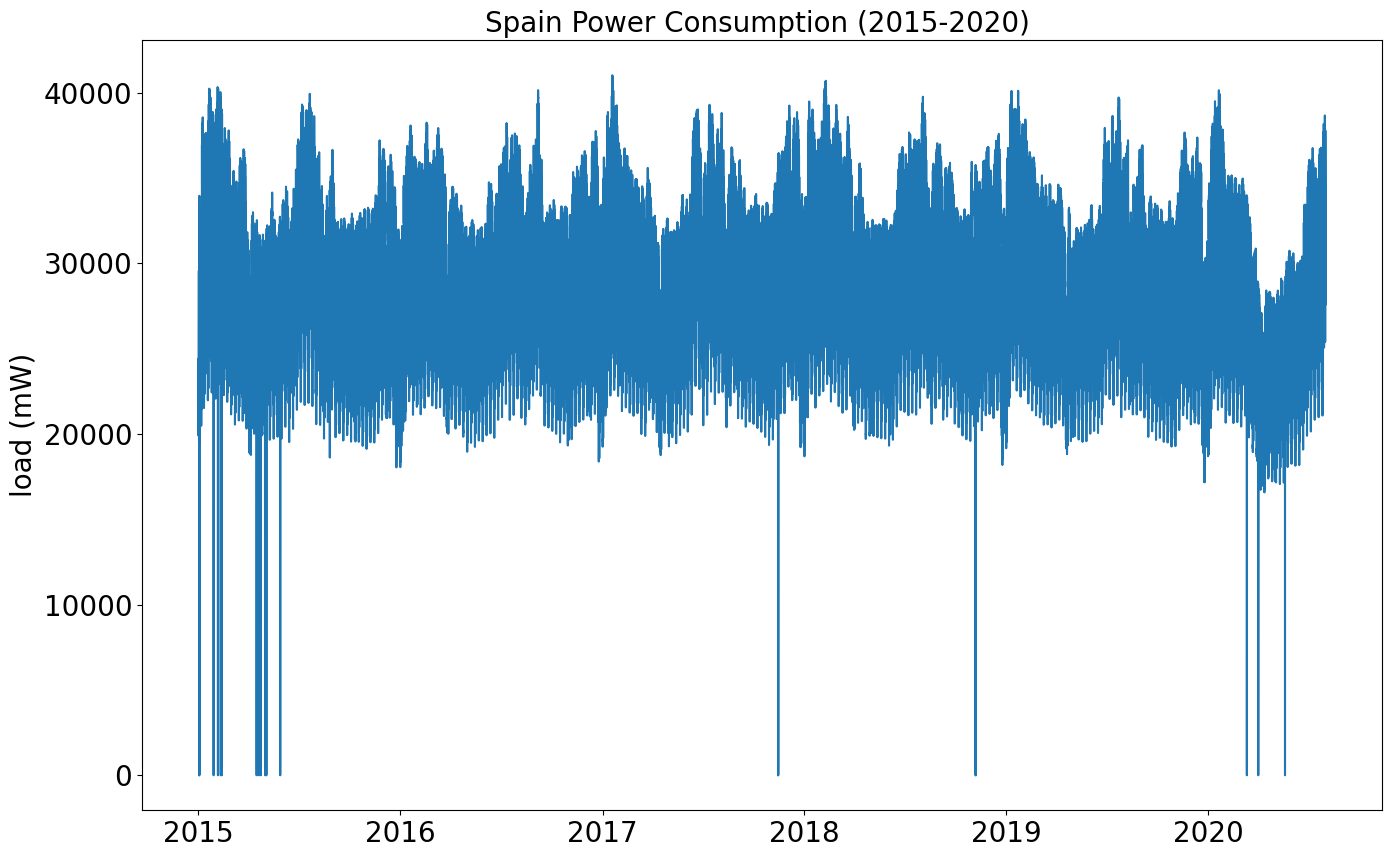

In [ ]:
  """
@author: vishva and sarah
Dataset: https://www.kaggle.com/francoisraucent/western-europe-power-consumption
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

import folium #to display interactive maps

import pandas as pd
from google.colab import files


#SPAIN DATASET

# Upload the CSV file
uploaded = files.upload()


# Read the CSV file
data = pd.read_csv('es.csv')


# Drop the 'end' column
data_es = data.drop(['end'], axis=1)


# Print the first 5 rows of the new DataFrame
# print(data_de.head())

train_set_es = data_es.loc[data_es['start'] <= '2015-01-31 00:00']
train_set_es = train_set_es.set_index("start")
train_set_es.index = pd.to_datetime(train_set_es.index)
train_set_es = train_set_es.groupby(pd.Grouper(freq="h")).sum()

test_set_es  = data_es.loc[data_es['start'] > '2015-01-31 00:00']
test_set_es = test_set_es.set_index("start")
test_set_es.index = pd.to_datetime(test_set_es.index)
test_set_es = test_set_es.groupby(pd.Grouper(freq="h")).sum()

data_es = data[['start', 'load']]
data_es['start'] = pd.to_datetime(data_es['start'])
data_es = data_es.set_index("start")
data_es = data_es.groupby(pd.Grouper(freq="h")).sum()

data_es['start'] = pd.to_datetime(data_es.index)

plt.figure(figsize=(16,10))
plt.plot(data_es['start'], data_es['load'])
plt.ylabel("load (mW)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Spain Power Consumption (2015-2020) ',fontsize=20)

#scaling, train_test_split
scaler=StandardScaler()
scaler = scaler.fit(train_set_es[['load']])

train_set_es['load'] = scaler.transform(train_set_es[['load']])
test_set_es['load'] = scaler.transform(test_set_es[['load']])

last_n = 24

def to_sequences(x, y, seq_size=1):
    x_values_es = []
    y_values_es = []
    for i in range(len(x)-last_n):
        x_values_es.append(x.iloc[i:(i+last_n)].values)
        y_values_es.append(y.iloc[i+last_n])
    return np.array(x_values_es), np.array(y_values_es)

x_train_es, y_train_es = to_sequences(train_set_es[['load']], train_set_es['load'], last_n)
x_test_es, y_test_es = to_sequences(test_set_es[['load']], test_set_es['load'], last_n)


Saving de.csv to de.csv


<ipython-input-3-a3ded4db85a9>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_de['start'] = pd.to_datetime(data_de['start'])


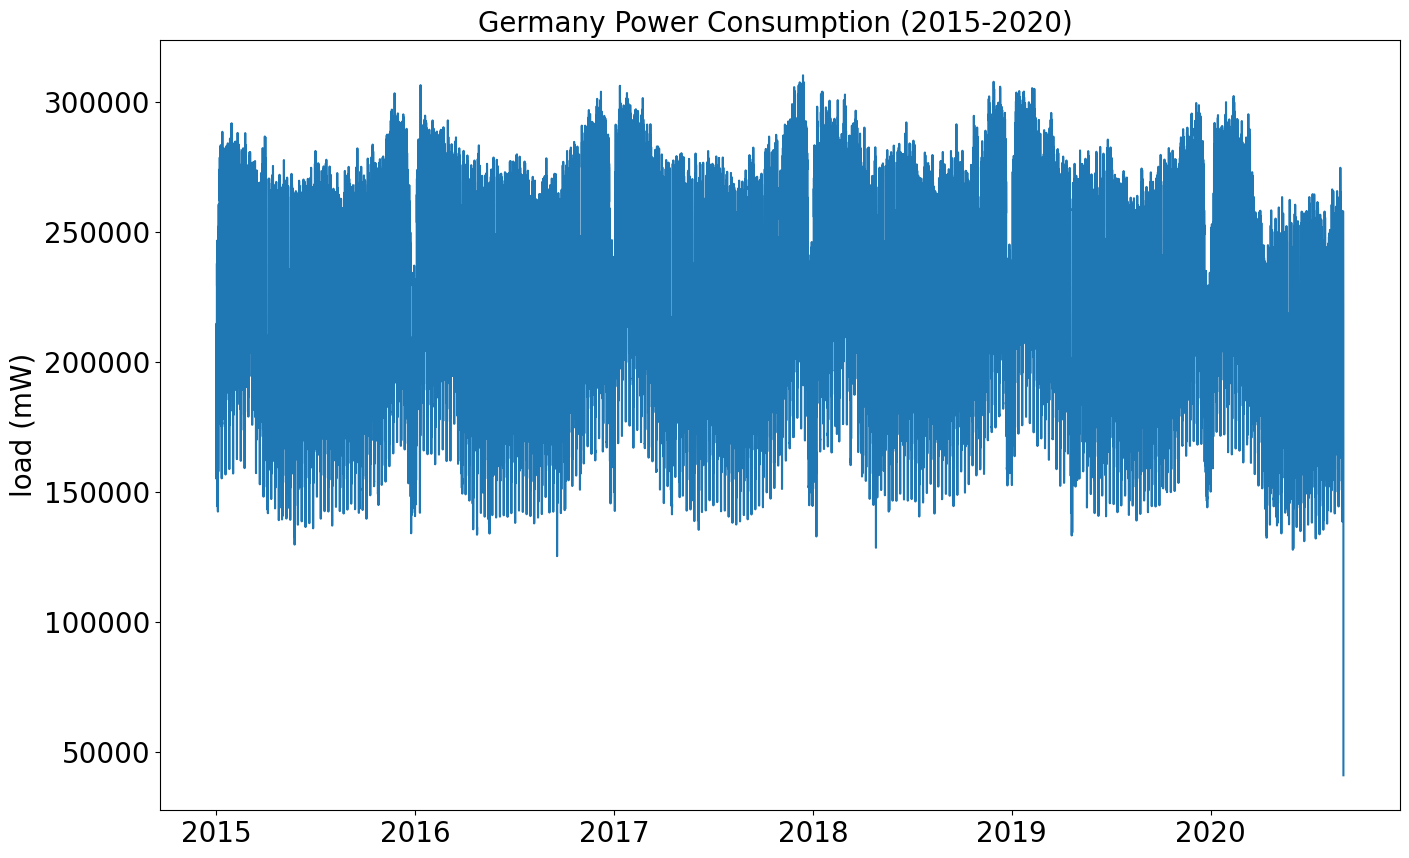

In [ ]:
"""
@author: vishva and sarah
Dataset: https://www.kaggle.com/francoisraucent/western-europe-power-consumption
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

import folium #to display interactive maps

import pandas as pd
from google.colab import files

#GERMANY DATASET

# Upload the CSV file
uploaded = files.upload()


# Read the CSV file
data = pd.read_csv('de.csv')


# Drop the 'end' column
data_de = data.drop(['end'], axis=1)


# Print the first 5 rows of the new DataFrame
# print(data_de.head())

train_set_de = data_de.loc[data_de['start'] <= '2015-01-31 00:00']
train_set_de = train_set_de.set_index("start")
train_set_de.index = pd.to_datetime(train_set_de.index)
train_set_de = train_set_de.groupby(pd.Grouper(freq="h")).sum()

test_set_de  = data_de.loc[data_de['start'] > '2015-01-31 00:00']
test_set_de = test_set_de.set_index("start")
test_set_de.index = pd.to_datetime(test_set_de.index)
test_set_de = test_set_de.groupby(pd.Grouper(freq="h")).sum()

data_de = data[['start', 'load']]
data_de['start'] = pd.to_datetime(data_de['start'])
data_de = data_de.set_index("start")
data_de = data_de.groupby(pd.Grouper(freq="h")).sum()

data_de['start'] = pd.to_datetime(data_de.index)

plt.figure(figsize=(16,10))
plt.plot(data_de['start'], data_de['load'])
plt.ylabel("load (mW)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Germany Power Consumption (2015-2020) ',fontsize=20)

#scaling, train_test_split
scaler=StandardScaler()
scaler = scaler.fit(train_set_de[['load']])

train_set_de['load'] = scaler.transform(train_set_de[['load']])
test_set_de['load'] = scaler.transform(test_set_de[['load']])

last_n = 24

def to_sequences(x, y, seq_size=1):
    x_values_de = []
    y_values_de = []
    for i in range(len(x)-last_n):
        x_values_de.append(x.iloc[i:(i+last_n)].values)
        y_values_de.append(y.iloc[i+last_n])
    return np.array(x_values_de), np.array(y_values_de)

x_train_de, y_train_de = to_sequences(train_set_de[['load']], train_set_de['load'], last_n)
x_test_de, y_test_de = to_sequences(test_set_de[['load']], test_set_de['load'], last_n)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 120)           58560     
                                                                 
 lstm_1 (LSTM)               (None, 24, 80)            64320     
                                                                 
 lstm_2 (LSTM)               (None, 40)                19360     
                                                                 
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 142,281
Trainable params: 142,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
20/20 [==============================] - 9s 128ms/step - loss: 0.7222 - val_loss: 0.6271
Epoch 2/25
20/20 [==============================] - 1s 65ms/step - loss: 0.5748 - 

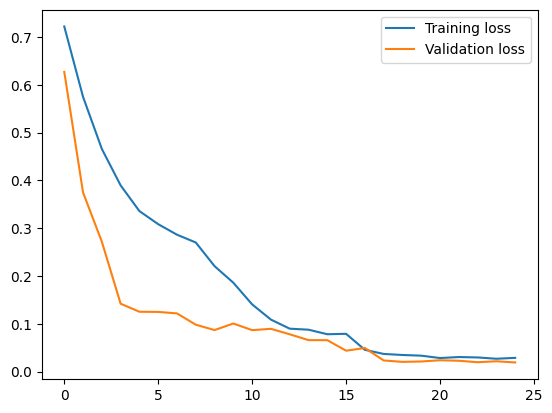

In [ ]:
#LSTM Model for France
model_fr=Sequential()
model_fr.add(LSTM(120,return_sequences=True,input_shape=(last_n,1)))
model_fr.add(LSTM(80,return_sequences=True))
model_fr.add(LSTM(40))
model_fr.add(Dense(1))
model_fr.compile(loss='mean_squared_error',optimizer='adam')
model_fr.summary()

history_fr = model_fr.fit(x_train_fr, y_train_fr, epochs=25, batch_size=32, validation_split=0.1) #CHANGE epochs back to 25

plt.plot(history_fr.history['loss'], label='Training loss')
plt.plot(history_fr.history['val_loss'], label='Validation loss')
plt.legend()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 24, 120)           58560     
                                                                 
 lstm_4 (LSTM)               (None, 24, 80)            64320     
                                                                 
 lstm_5 (LSTM)               (None, 40)                19360     
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 142,281
Trainable params: 142,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
20/20 [==============================] - 9s 173ms/step - loss: 0.8588 - val_loss: 0.7693
Epoch 2/25
20/20 [==============================] - 1s 63ms/step - loss: 0.6283 

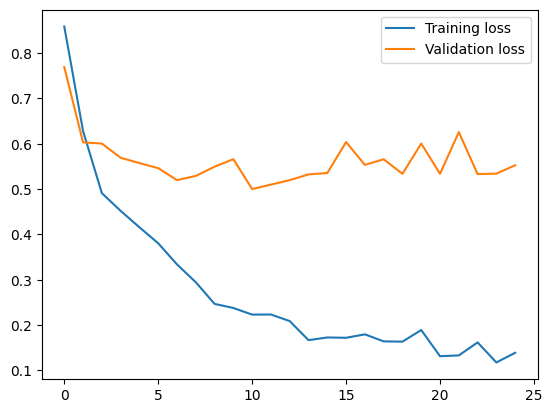

In [ ]:
#LSTM Model for Spain *had small issue where had to rerun after France/Germany to get proper results
model_es=Sequential()
model_es.add(LSTM(120,return_sequences=True,input_shape=(last_n,1)))
model_es.add(LSTM(80,return_sequences=True))
model_es.add(LSTM(40))
model_es.add(Dense(1))
model_es.compile(loss='mean_squared_error',optimizer='adam')
model_es.summary()

history_es = model_es.fit(x_train_es, y_train_es, epochs=25, batch_size=32, validation_split=0.1) #CHANGE epochs back to 25

plt.plot(history_es.history['loss'], label='Training loss')
plt.plot(history_es.history['val_loss'], label='Validation loss')
plt.legend()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 24, 120)           58560     
                                                                 
 lstm_7 (LSTM)               (None, 24, 80)            64320     
                                                                 
 lstm_8 (LSTM)               (None, 40)                19360     
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 142,281
Trainable params: 142,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
20/20 [==============================] - 15s 129ms/step - loss: 0.7423 - val_loss: 0.4852
Epoch 2/25
20/20 [==============================] - 1s 62ms/step - loss: 0.3898

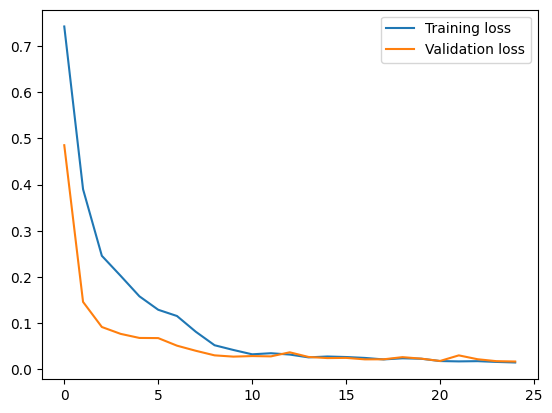

In [ ]:
#LSTM Model for Germany
model_de=Sequential()
model_de.add(LSTM(120,return_sequences=True,input_shape=(last_n,1)))
model_de.add(LSTM(80,return_sequences=True))
model_de.add(LSTM(40))
model_de.add(Dense(1))
model_de.compile(loss='mean_squared_error',optimizer='adam')
model_de.summary()

history_de = model_de.fit(x_train_de, y_train_de, epochs=25, batch_size=32, validation_split=0.1) #CHANGE epochs back to 25

plt.plot(history_de.history['loss'], label='Training loss')
plt.plot(history_de.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
#Predictions (LSTM) for France
train_predict_fr = model_fr.predict(x_train_fr)
test_predict_fr  = model_fr.predict(x_test_fr)

predict_train_fr = scaler_fr.inverse_transform(train_predict_fr)
predict_test_fr  = scaler_fr.inverse_transform(test_predict_fr)


1506/1506 [==============================] - 34s 22ms/step


In [ ]:
#Predictions (LSTM) for Spain
train_predict_es = model_es.predict(x_train_es)
test_predict_es  = model_es.predict(x_test_es)

predict_train_es = scaler.inverse_transform(train_predict_es)
predict_test_es  = scaler.inverse_transform(test_predict_es)


1506/1506 [==============================] - 32s 21ms/step


In [ ]:
#Predictions (LSTM) for Germany
train_predict_de = model_de.predict(x_train_de)
test_predict_de  = model_de.predict(x_test_de)

predict_train_de = scaler.inverse_transform(train_predict_de)
predict_test_de  = scaler.inverse_transform(test_predict_de)


1530/1530 [==============================] - 35s 23ms/step


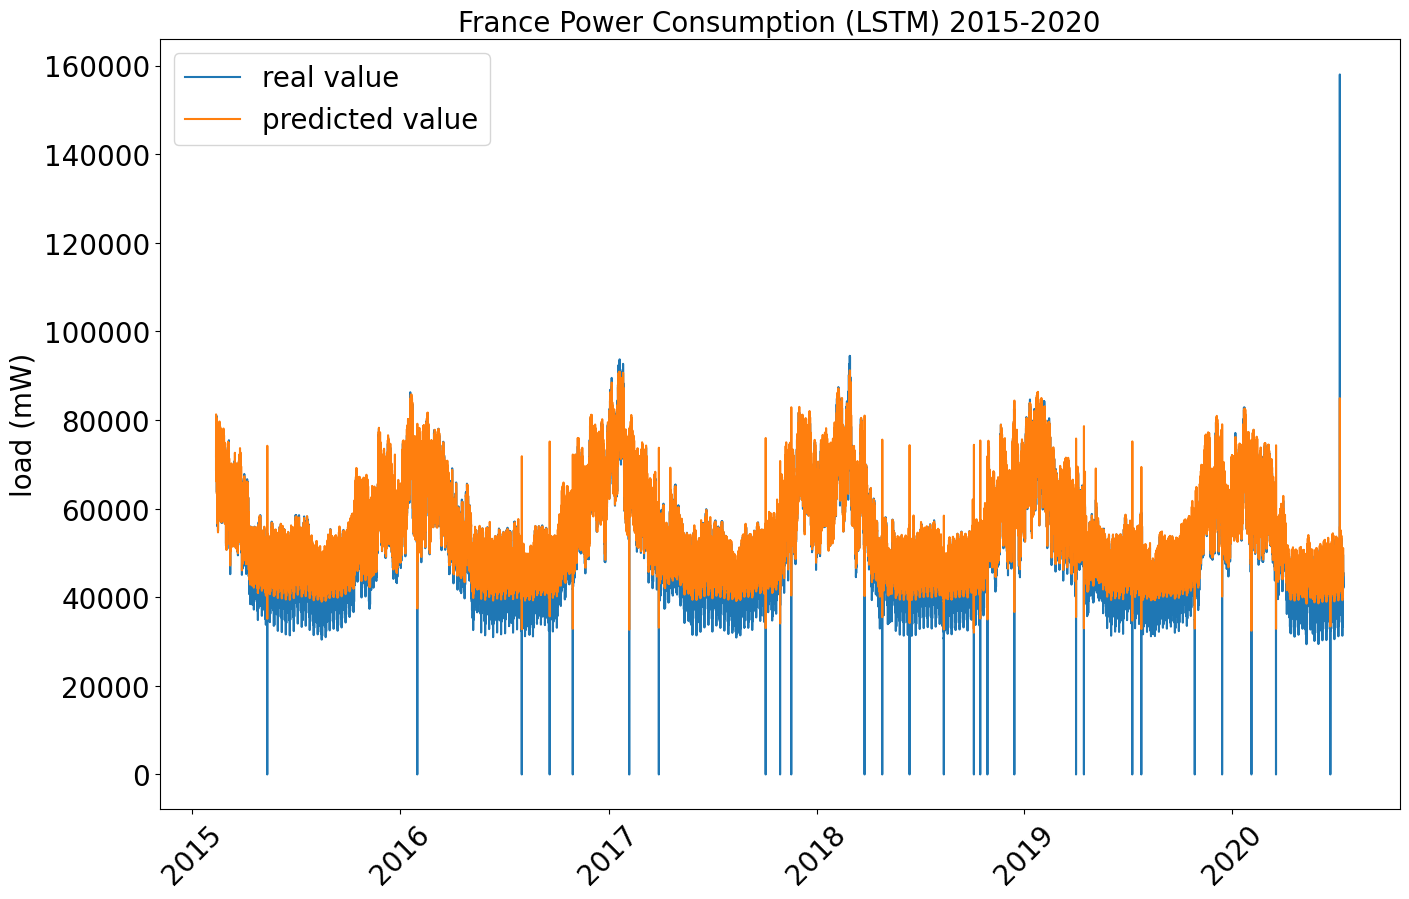

In [ ]:
#Visualization of predictions(test_set) for France
previous_days_fr = last_n

#testPredictPlot = np.empty_like(df['load'])
testPredictPlot_fr = np.empty_like(data_fr['load'])
testPredictPlot_fr[:] = np.nan
testPredictPlot_fr = testPredictPlot_fr.reshape(-1,1)
testPredictPlot_fr[len(train_predict_fr)+(previous_days_fr*2):len(data_fr), :] = predict_test_fr

df_tpp_fr = pd.DataFrame(data=testPredictPlot_fr, columns=['load'])
df_tpp_fr['start'] = data_fr.index
df_tpp_fr['start'] = pd.to_datetime(df_tpp_fr['start'])
df_tpp_fr = df_tpp_fr.set_index("start")

df_predict_fr = data_fr['load']

plt.figure(figsize=(16,10))
plt.plot(df_predict_fr[1000:48500],label='real value')
plt.xticks(rotation=45)
plt.ylabel("load (mW)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('France Power Consumption (LSTM) 2015-2020',fontsize=20)
plt.plot(df_tpp_fr[1000:48500],label='predicted value')
plt.xticks(rotation=45)
plt.legend(fontsize=20)
plt.show()

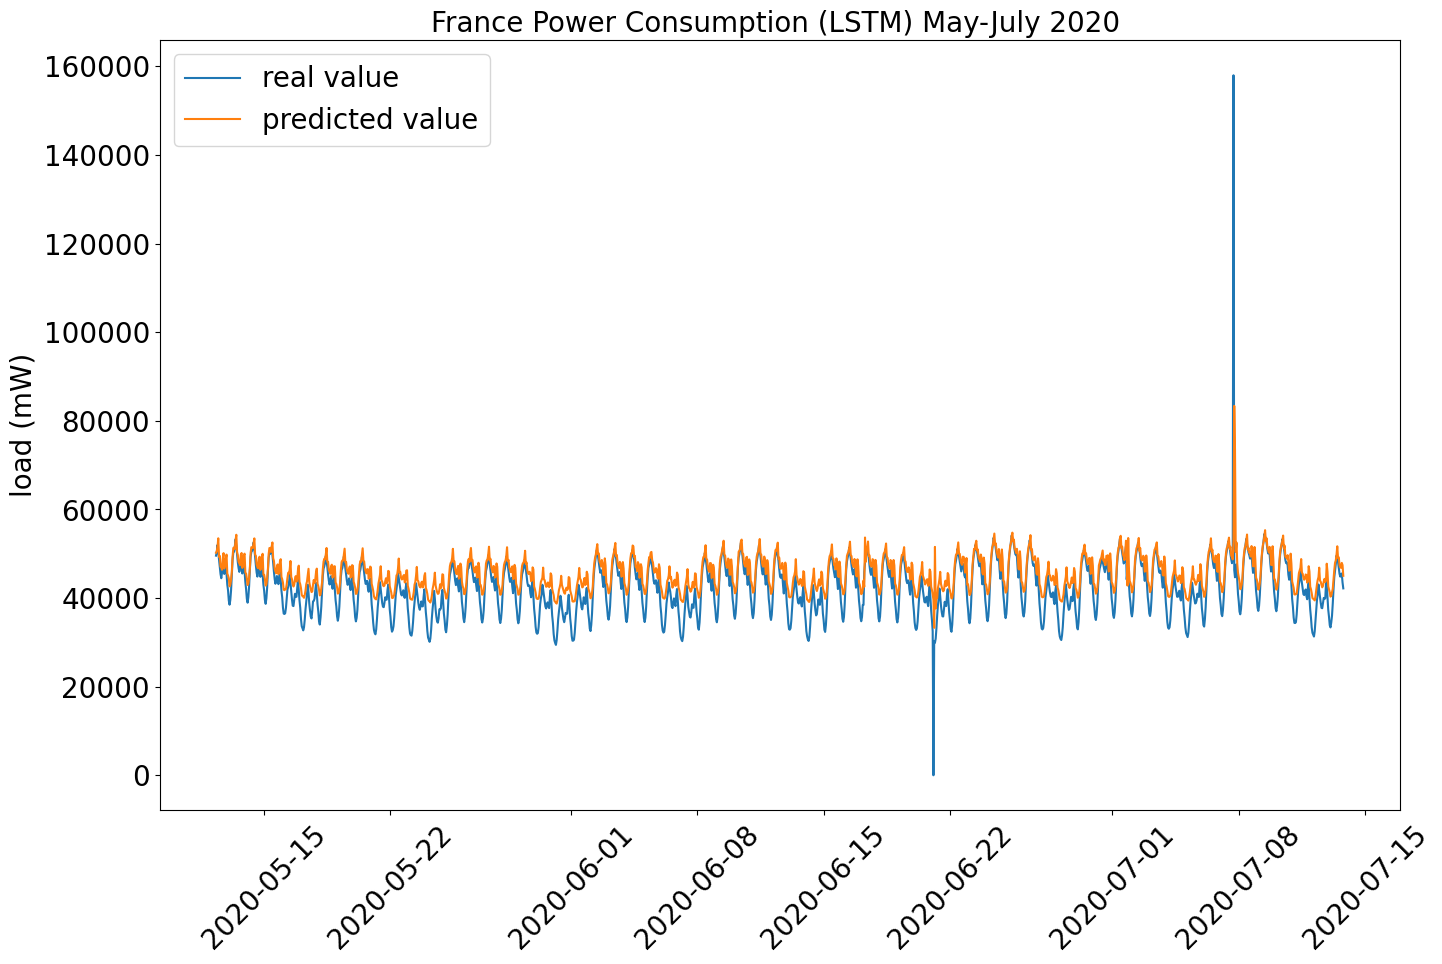

In [ ]:
#France Power ONLY May-July 2020 for better visualization

plt.figure(figsize=(16,10))
plt.plot(df_predict_fr[47000:48500],label='real value')
plt.xticks(rotation=45)
plt.ylabel("load (mW)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('France Power Consumption (LSTM) May-July 2020 ',fontsize=20)
plt.plot(df_tpp_fr[47000:48500],label='predicted value')
plt.xticks(rotation=45)
plt.legend(fontsize=20)
plt.show()


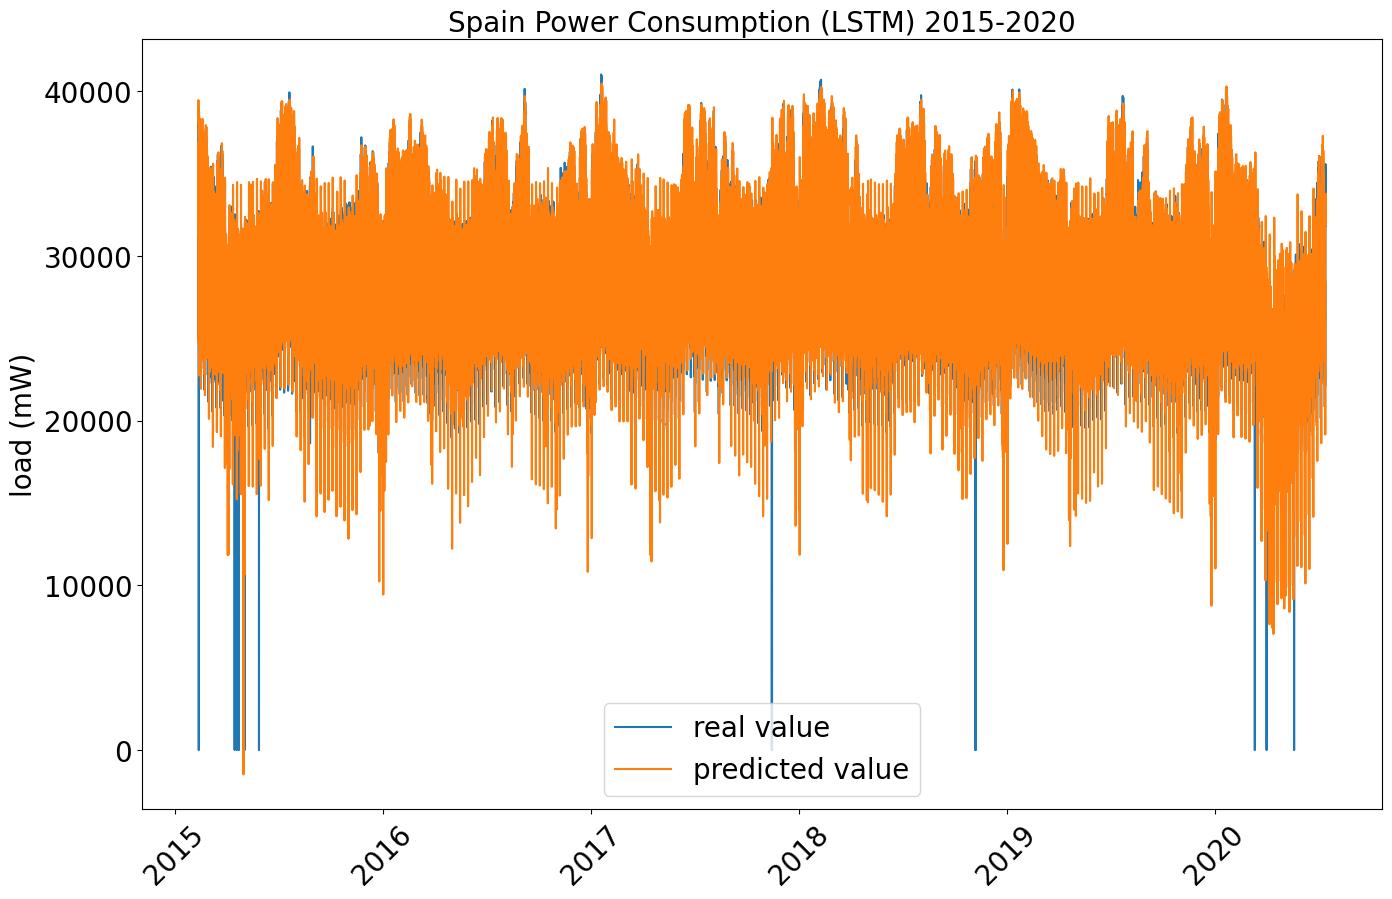

In [ ]:
#Visualization of predictions(test_set) for Spain
previous_days_es = last_n

#testPredictPlot = np.empty_like(df['load'])
testPredictPlot_es = np.empty_like(data_es['load'])
testPredictPlot_es[:] = np.nan
testPredictPlot_es = testPredictPlot_es.reshape(-1,1)
testPredictPlot_es[len(train_predict_es)+(previous_days_es*2):len(data_es), :] = predict_test_es

df_tpp_es = pd.DataFrame(data=testPredictPlot_es, columns=['load'])
df_tpp_es['start'] = data_es.index
df_tpp_es['start'] = pd.to_datetime(df_tpp_es['start'])
df_tpp_es = df_tpp_es.set_index("start")

df_predict_es = data_es['load']

plt.figure(figsize=(16,10))
plt.plot(df_predict_es[1000:48500],label='real value')
plt.xticks(rotation=45)
plt.ylabel("load (mW)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Spain Power Consumption (LSTM) 2015-2020',fontsize=20)
plt.plot(df_tpp_es[1000:48500],label='predicted value')
plt.xticks(rotation=45)
plt.legend(fontsize=20)
plt.show()

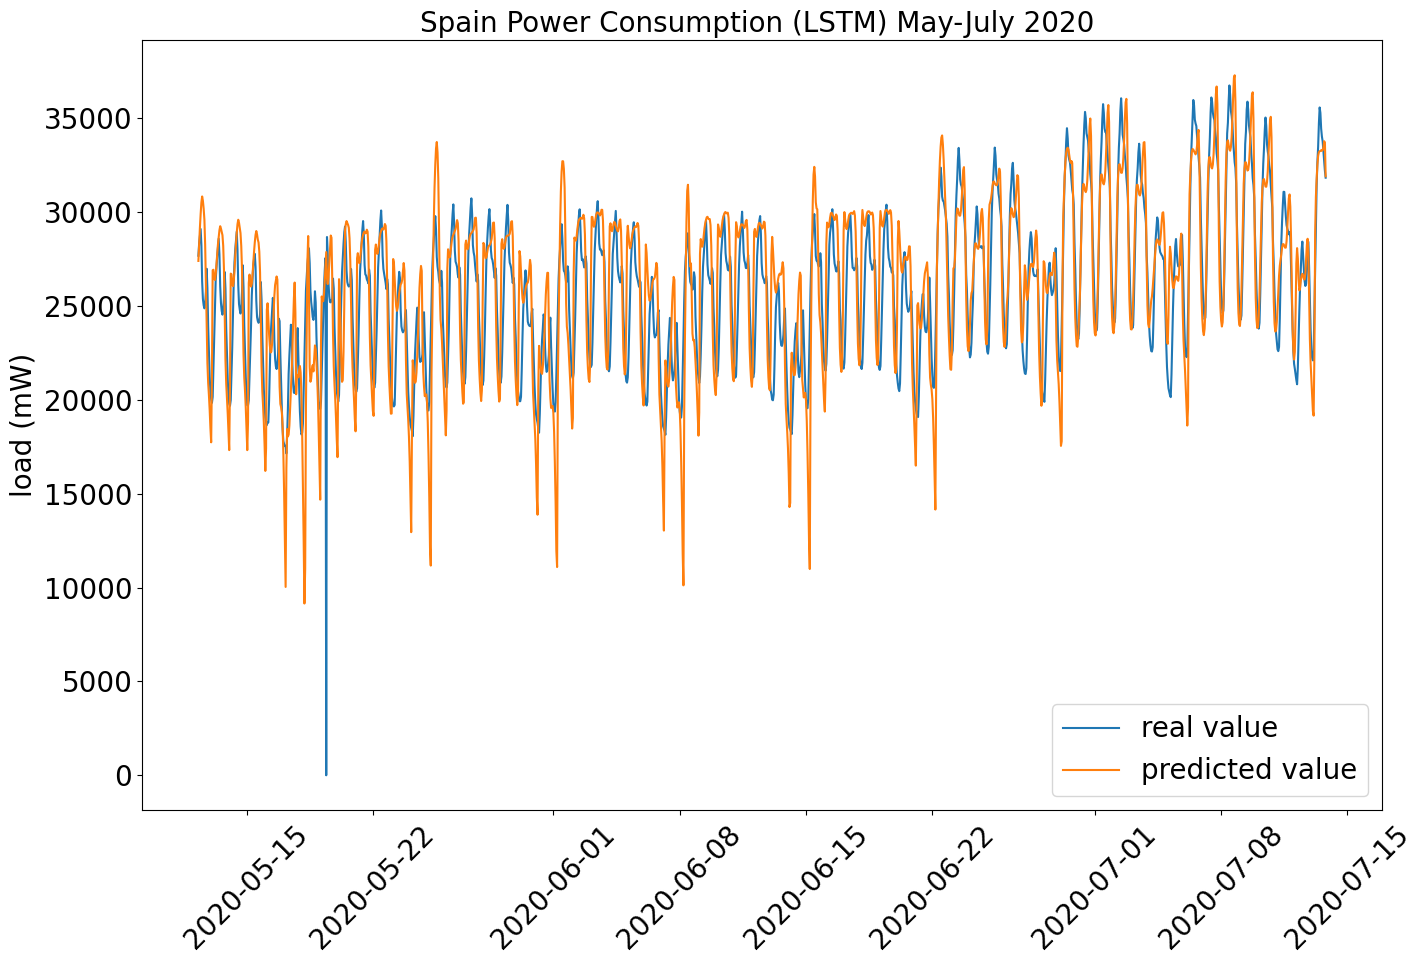

In [ ]:
# Spain Power ONLY May-July 2020 for better visualization

plt.figure(figsize=(16,10))
plt.plot(df_predict_es[47000:48500],label='real value')
plt.xticks(rotation=45)
plt.ylabel("load (mW)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Spain Power Consumption (LSTM) May-July 2020 ',fontsize=20)
plt.plot(df_tpp_es[47000:48500],label='predicted value')
plt.xticks(rotation=45)
plt.legend(fontsize=20)
plt.show()


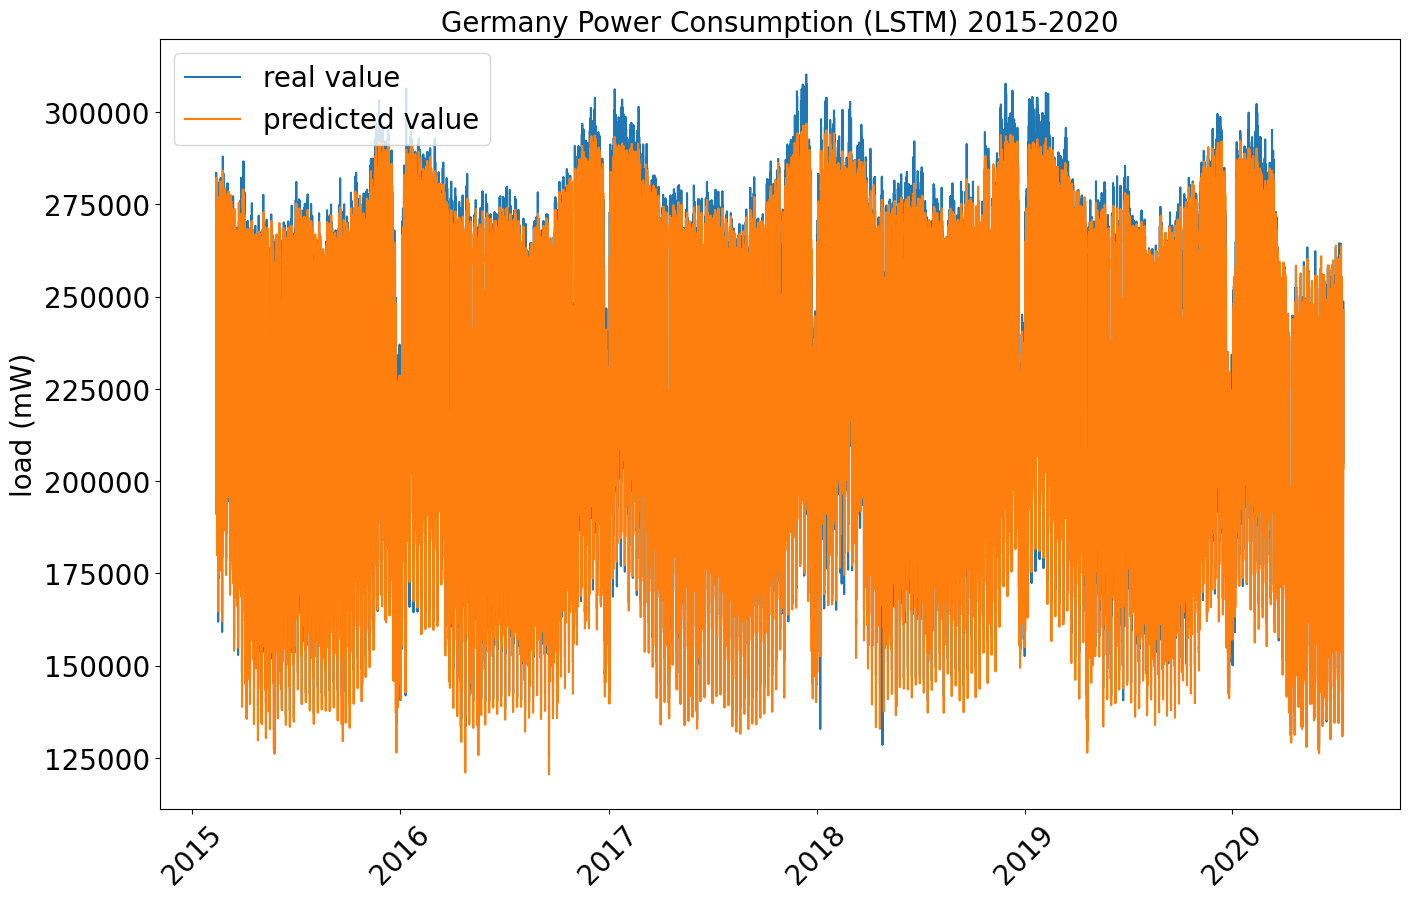

In [ ]:
#Visualization of predictions(test_set) for Germany
previous_days_de = last_n

#testPredictPlot = np.empty_like(df['load'])
testPredictPlot_de = np.empty_like(data_de['load'])
testPredictPlot_de[:] = np.nan
testPredictPlot_de = testPredictPlot_de.reshape(-1,1)
testPredictPlot_de[len(train_predict_de)+(previous_days_de*2):len(data_de), :] = predict_test_de

df_tpp_de = pd.DataFrame(data=testPredictPlot_de, columns=['load'])
df_tpp_de['start'] = data_de.index
df_tpp_de['start'] = pd.to_datetime(df_tpp_de['start'])
df_tpp_de = df_tpp_de.set_index("start")

df_predict_de = data_de['load']

plt.figure(figsize=(16,10))
plt.plot(df_predict_de[1000:48500],label='real value')
plt.xticks(rotation=45)
plt.ylabel("load (mW)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Germany Power Consumption (LSTM) 2015-2020',fontsize=20)
plt.plot(df_tpp_de[1000:48500],label='predicted value')
plt.xticks(rotation=45)
plt.legend(fontsize=20)
plt.show()

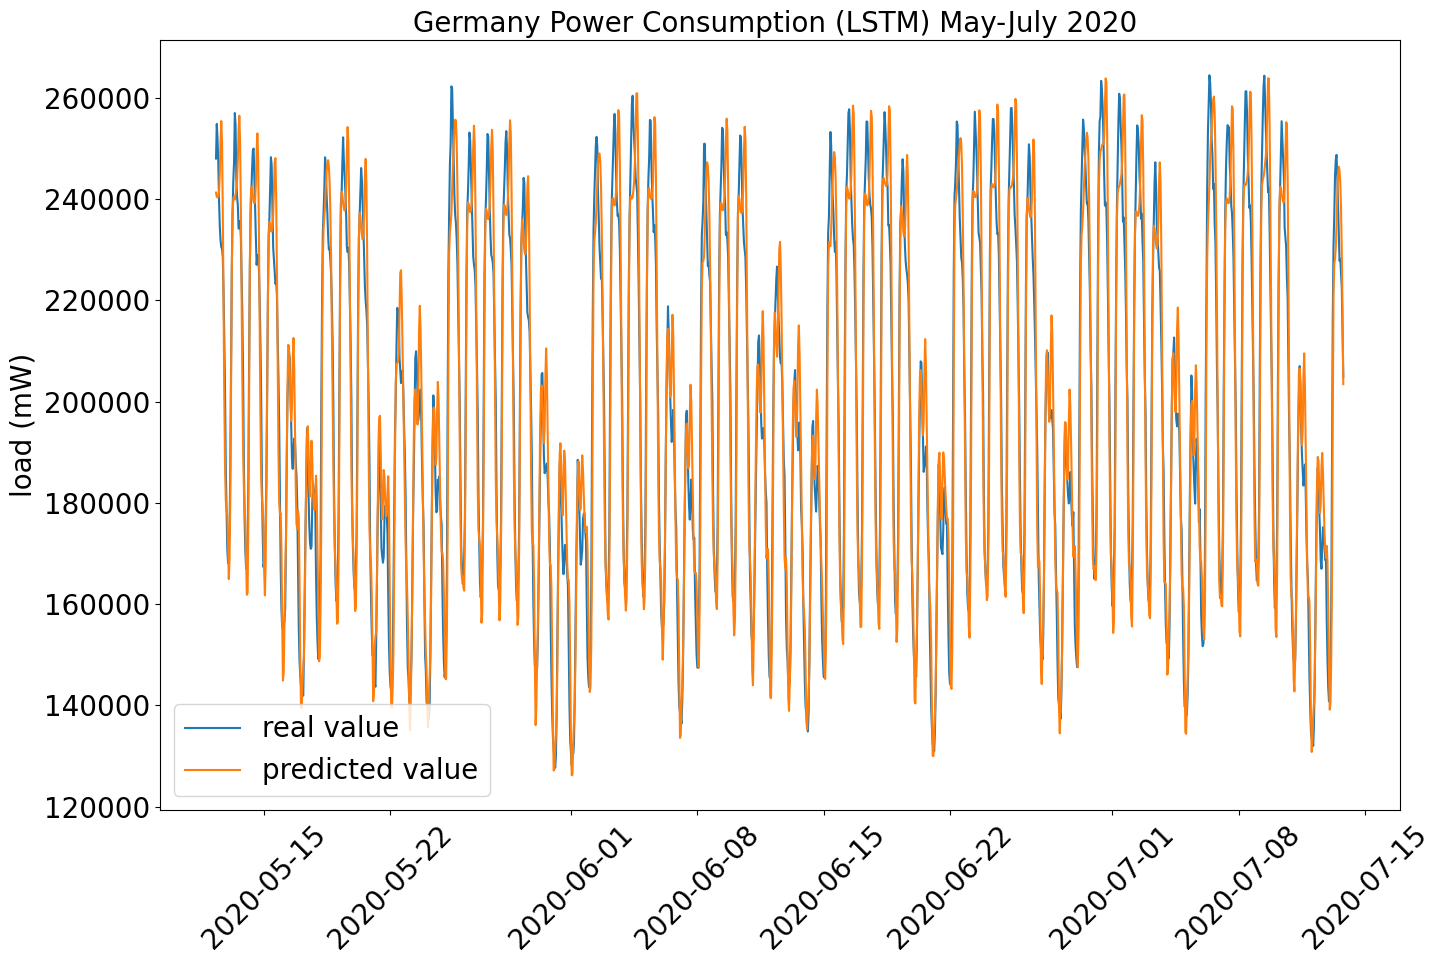

In [ ]:
# Germany Power ONLY May-July 2020 for better visualization

plt.figure(figsize=(16,10))
plt.plot(df_predict_de[47000:48500],label='real value')
plt.xticks(rotation=45)
plt.ylabel("load (mW)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Germany Power Consumption (LSTM) May-July 2020 ',fontsize=20)
plt.plot(df_tpp_de[47000:48500],label='predicted value')
plt.xticks(rotation=45)
plt.legend(fontsize=20)
plt.show()


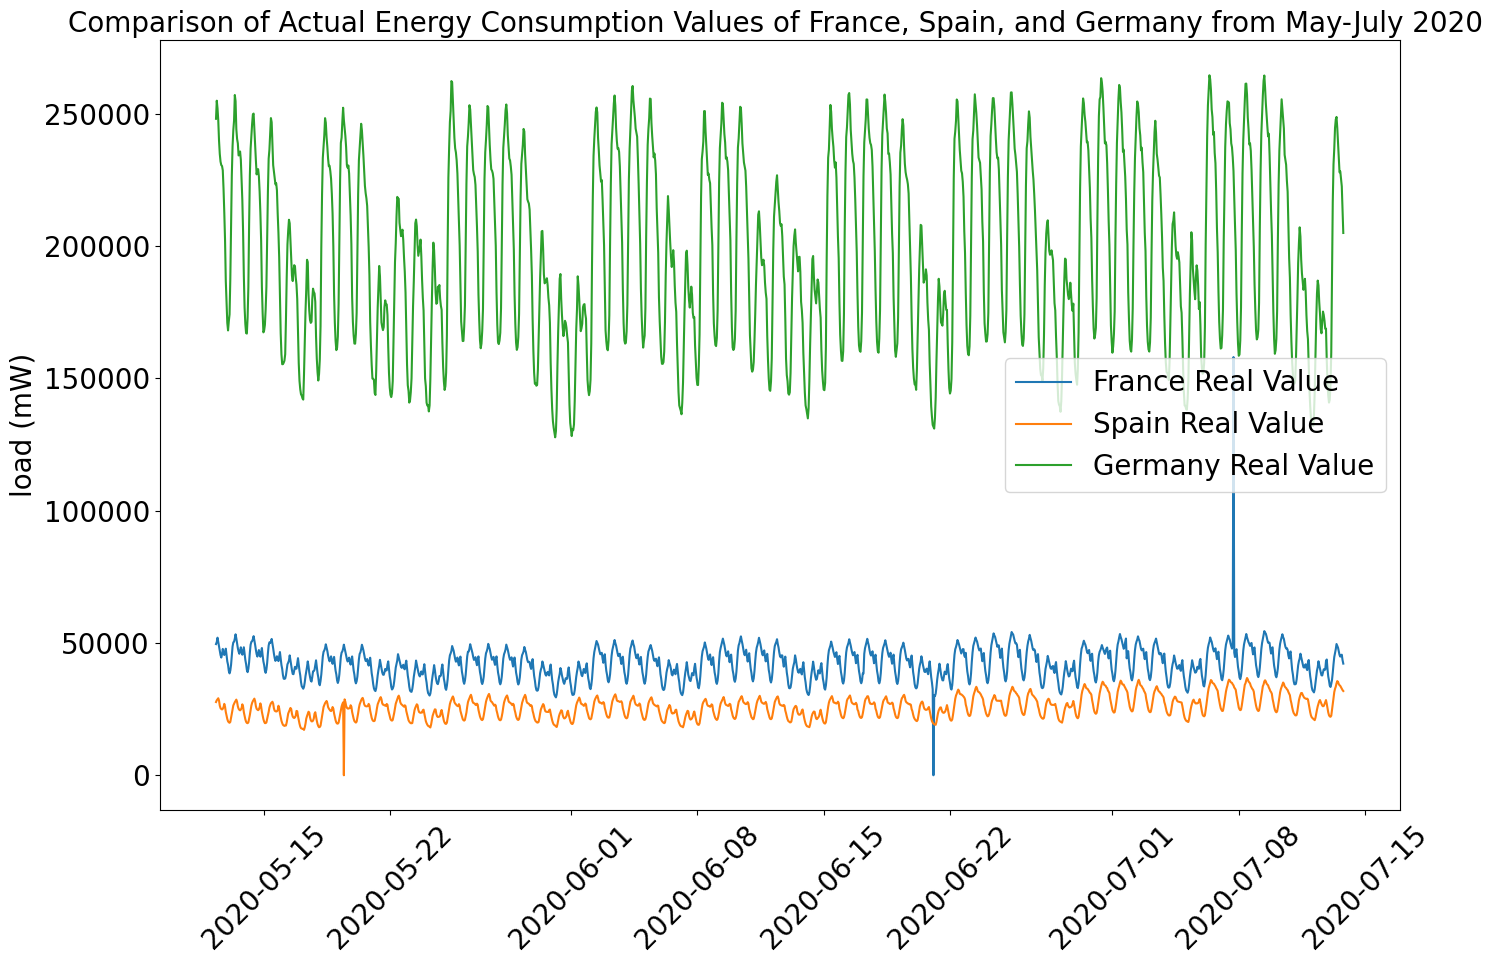

In [ ]:
# Comparison of Actual Energy Consumption Values of France, Spain, and Germany from May-July 2020

plt.figure(figsize=(16,10))
plt.plot(df_predict_fr[47000:48500],label='France Real Value')
plt.plot(df_predict_es[47000:48500],label='Spain Real Value')
plt.plot(df_predict_de[47000:48500],label='Germany Real Value')

plt.xticks(rotation=45)
plt.ylabel("load (mW)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Comparison of Actual Energy Consumption Values of France, Spain, and Germany from May-July 2020 ',fontsize=20)
plt.xticks(rotation=45)
plt.legend(fontsize=20)
plt.show()


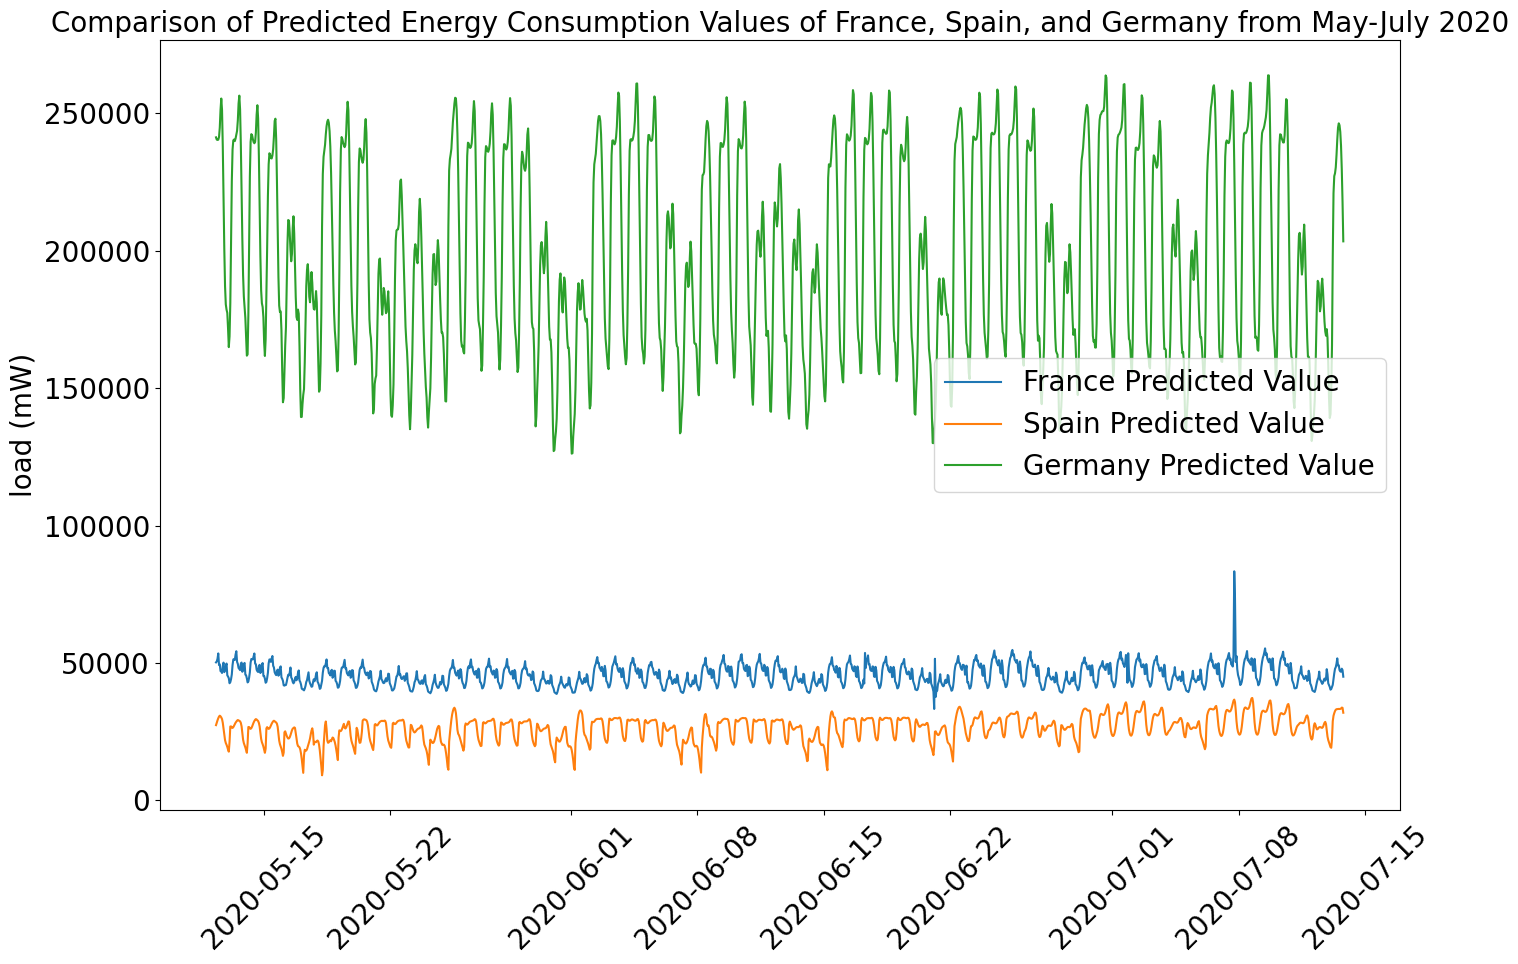

In [ ]:
# Comparison of Predicted Energy Consumption Values of France, Spain, and Germany from May-July 2020

plt.figure(figsize=(16,10))

plt.xticks(rotation=45)
plt.ylabel("load (mW)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Comparison of Predicted Energy Consumption Values of France, Spain, and Germany from May-July 2020',fontsize=20)
plt.plot(df_tpp_fr[47000:48500],label='France Predicted Value')
plt.plot(df_tpp_es[47000:48500],label='Spain Predicted Value')
plt.plot(df_tpp_de[47000:48500],label='Germany Predicted Value')

plt.xticks(rotation=45)
plt.legend(fontsize=20)
plt.show()
